In [1]:
import os
import requests
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
dir = 'Covid19 new'

In [3]:
# looping in folders
for folder in os.listdir(dir):
    # looping inside subfolders
    if os.path.isdir(os.path.join(dir, folder)):
        for subfolder in os.listdir(os.path.join(dir, folder)):
          # print name of subfolder and len
          print(folder, subfolder, len(os.listdir(os.path.join(dir, folder, subfolder))))

COVID images 4000
Normal images 4000
Viral Pneumonia images 4000


In [4]:
# import librairies
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import tensorflow as tf

COVID images
image shape (299, 299, 3)


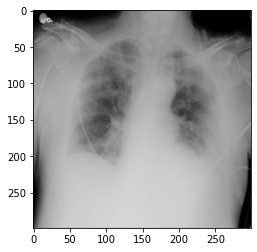

Normal images
image shape (299, 299, 3)


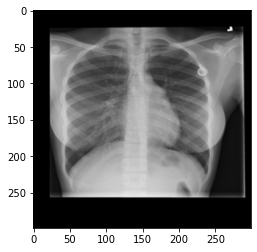

Viral Pneumonia images
image shape (299, 299, 3)


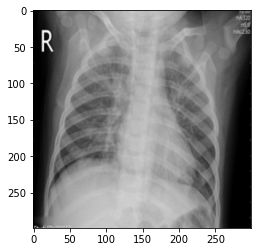

In [5]:
# display image from each folder
# looping in folders
i=1
for folder in os.listdir(dir):
    # looping inside subfolders
    if os.path.isdir(os.path.join(dir, folder)):
        for subfolder in os.listdir(os.path.join(dir, folder)):
          # print name of subfolder and len
          print(folder, subfolder)
          img = cv2.imread(os.path.join(dir, folder, subfolder, os.listdir(os.path.join(dir, folder, subfolder))[0]))
          print('image shape {}'.format(img.shape))
          #plt.subplot(2,4,i)
          i = i+1
          plt.imshow(img)
          plt.show()
          

In [6]:
dir

'Covid19 new'

In [7]:
# creat path for images folders
#fetching folder names
pathes = []
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        pathes.append(os.path.join(dir, folder))
pathes

['Covid19 new\\COVID', 'Covid19 new\\Normal', 'Covid19 new\\Viral Pneumonia']

In [8]:
# load images
def load_images(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)) :
        img_path = path + '/' + urls[i]
        img = cv2.imread(img_path)
        img = img / 255.0
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append(target)
    images = np.array(images)
    return images, labels

In [9]:
# load images and labels
# get covid path
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        if folder == 'COVID':
            for subfolder in os.listdir(os.path.join(dir, folder)):
                if subfolder == 'images':
                  covid_path = os.path.join(dir, folder, subfolder)
                  covid_urls = os.listdir(covid_path)
                  covid_images, covid_target = load_images(covid_path , covid_urls, 1)
            

In [10]:
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        if folder == 'Normal':
            for subfolder in os.listdir(os.path.join(dir, folder)):
                if subfolder == 'images':
                  normal_path = os.path.join(dir, folder, subfolder)
                  normal_urls = os.listdir(normal_path)
                  normal_images, normal_target = load_images(normal_path , normal_urls, 0)

In [11]:
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        if folder == 'Viral Pneumonia':
            for subfolder in os.listdir(os.path.join(dir, folder)):
                if subfolder == 'images':
                  viral_pneumonia_path = os.path.join(dir, folder, subfolder)
                  viral_pneumonia_urls = os.listdir(viral_pneumonia_path)
                  viral_pneumonia_images, viral_pneumonia_target = load_images(viral_pneumonia_path , viral_pneumonia_urls, 2)

In [12]:
covid_images.shape

(4000, 32, 32, 3)

In [13]:
normal_images.shape

(4000, 32, 32, 3)

In [14]:
viral_pneumonia_images.shape

(4000, 32, 32, 3)

In [15]:
type(covid_target)

list

In [16]:
#ovo su slike
data = np.r_[covid_images, normal_images, viral_pneumonia_images]

In [17]:
data.shape

(12000, 32, 32, 3)

In [18]:
targets = np.r_[covid_target, normal_target, viral_pneumonia_target]
targets.shape

(12000,)

In [19]:
type(targets)

numpy.ndarray

In [20]:
print(targets)

[1 1 1 ... 2 2 2]


In [21]:
len(targets)

12000

In [22]:
 len(data)

12000

In [23]:
len(covid_target)

4000

In [24]:
type(data)

numpy.ndarray

In [25]:
len(data)

12000

In [26]:
data[0].shape

(32, 32, 3)

In [27]:
#targeti, 0 - normal, 1- covid  2- viral pneumonia

In [28]:
# import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3,random_state=23,stratify=targets)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [30]:
#!pip install numpy --upgrade

In [31]:

#config.gpu_options.allow_growth = True

In [32]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D())
#model.add(Conv2D(16, 3, activation='relu'))
#model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [33]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [34]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [35]:
#early stopping
from keras.callbacks import EarlyStopping
es_monitor = EarlyStopping(patience=20)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=30)

In [36]:
model.compile(optimizer=Adam(lr=0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

D:\Installations\anaconda\envs\ml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
#model.compile(optimizer = Adam(learning_rate=.00025) , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                            #factor=0.5, min_lr=0.00001)

In [39]:
#model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[es])
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test),callbacks=[es_monitor])
#model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)


Epoch 1/100


D:\Installations\anaconda\envs\ml\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


263/263 [==============================] - 3s 10ms/step - loss: 0.5842 - accuracy: 0.7452 - val_loss: 0.4139 - val_accuracy: 0.8269
Epoch 2/100
263/263 [==============================] - 2s 9ms/step - loss: 0.3542 - accuracy: 0.8588 - val_loss: 0.3082 - val_accuracy: 0.8769
Epoch 3/100
263/263 [==============================] - 2s 9ms/step - loss: 0.3035 - accuracy: 0.8792 - val_loss: 0.2927 - val_accuracy: 0.8847
Epoch 4/100
263/263 [==============================] - 2s 9ms/step - loss: 0.2633 - accuracy: 0.8979 - val_loss: 0.3065 - val_accuracy: 0.8767
Epoch 5/100
263/263 [==============================] - 2s 9ms/step - loss: 0.2399 - accuracy: 0.9069 - val_loss: 0.2479 - val_accuracy: 0.9047
Epoch 6/100
263/263 [==============================] - 2s 9ms/step - loss: 0.2052 - accuracy: 0.9210 - val_loss: 0.2901 - val_accuracy: 0.8831
Epoch 7/100
263/263 [==============================] - 2s 9ms/step - loss: 0.1931 - accuracy: 0.9243 - val_loss: 0.2119 - val_accuracy: 0.9136
Epoch 8/10

263/263 [==============================] - 2s 9ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.1430 - val_accuracy: 0.9597
Epoch 59/100
263/263 [==============================] - 2s 9ms/step - loss: 0.0304 - accuracy: 0.9894 - val_loss: 0.1471 - val_accuracy: 0.9656
Epoch 60/100
263/263 [==============================] - 2s 9ms/step - loss: 0.0244 - accuracy: 0.9912 - val_loss: 0.1482 - val_accuracy: 0.9678
Epoch 61/100
263/263 [==============================] - 2s 9ms/step - loss: 0.0145 - accuracy: 0.9944 - val_loss: 0.1172 - val_accuracy: 0.9750


In [46]:
def get_metrics(history):
    fig = plt.figure(figsize = (10,8))
    plt.subplot(2,2,1)
    plt.plot(history.history["accuracy"], label = "training accuracy")
    plt.plot(history.history["val_accuracy"], label = "val accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(2,2,2)
    plt.plot(history.history["loss"], label = "train loss")
    plt.plot(history.history["val_loss"], label = "val loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.savefig('DCNN training loss accuracy.pdf',dpi=300)

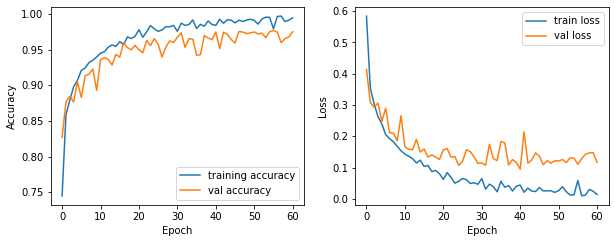

In [47]:
history = model.history
get_metrics(history)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [43]:
print(history.history['accuracy'])

[0.7483333349227905, 0.8705952167510986, 0.8903571367263794, 0.9125000238418579, 0.9252380728721619, 0.9285714030265808, 0.9364285469055176, 0.9417856931686401, 0.9470238089561462, 0.9570237994194031, 0.9605952501296997, 0.9626190662384033, 0.9645237922668457, 0.9741666913032532, 0.9655952453613281, 0.9713095426559448, 0.9727380871772766, 0.9791666865348816, 0.9815475940704346, 0.9813095331192017, 0.9780952334403992, 0.9847618937492371, 0.9801190495491028, 0.9876190423965454, 0.9836905002593994, 0.9813095331192017, 0.9898809790611267, 0.9884523749351501, 0.9819047451019287, 0.9858333468437195, 0.9932143092155457, 0.9950000047683716, 0.9915476441383362, 0.983214259147644, 0.9933333396911621, 0.9825000166893005, 0.9889285564422607, 0.9913095235824585, 0.9952380657196045, 0.9861904978752136, 0.9915476441383362]


In [44]:
#model prediction

In [49]:
preds= model.predict(X_test)

113/113 [==============================] - 0s 2ms/step


In [50]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
accuracy_score(y_test, np.argmax(predictions, axis=1))

113/113 [==============================] - 0s 2ms/step


0.975

In [52]:
#classification report

In [53]:
cr = classification_report(y_test,np.argmax(predictions,axis=1),output_dict=True)

In [54]:
#save classification report to dataframe




In [55]:
print(cr)

{'0': {'precision': 0.9589827727645611, 'recall': 0.9741666666666666, 'f1-score': 0.9665150888797024, 'support': 1200}, '1': {'precision': 0.9787955894826124, 'recall': 0.9616666666666667, 'f1-score': 0.9701555275325766, 'support': 1200}, '2': {'precision': 0.9875207986688852, 'recall': 0.9891666666666666, 'f1-score': 0.9883430474604495, 'support': 1200}, 'accuracy': 0.975, 'macro avg': {'precision': 0.9750997203053529, 'recall': 0.975, 'f1-score': 0.9750045546242427, 'support': 3600}, 'weighted avg': {'precision': 0.9750997203053529, 'recall': 0.975, 'f1-score': 0.9750045546242428, 'support': 3600}}


In [56]:
df_cr = pd.DataFrame(cr)

In [57]:
df_cr.to_csv('DCNN cr test.csv')

In [58]:
print(cr)

{'0': {'precision': 0.9589827727645611, 'recall': 0.9741666666666666, 'f1-score': 0.9665150888797024, 'support': 1200}, '1': {'precision': 0.9787955894826124, 'recall': 0.9616666666666667, 'f1-score': 0.9701555275325766, 'support': 1200}, '2': {'precision': 0.9875207986688852, 'recall': 0.9891666666666666, 'f1-score': 0.9883430474604495, 'support': 1200}, 'accuracy': 0.975, 'macro avg': {'precision': 0.9750997203053529, 'recall': 0.975, 'f1-score': 0.9750045546242427, 'support': 3600}, 'weighted avg': {'precision': 0.9750997203053529, 'recall': 0.975, 'f1-score': 0.9750045546242428, 'support': 3600}}


In [59]:
#predict on train set

In [60]:
predictions = model.predict(X_train)
accuracy_score(y_train, np.argmax(predictions, axis=1))

263/263 [==============================] - 1s 2ms/step


0.996904761904762

In [61]:
cr = classification_report(y_train,np.argmax(predictions,axis=1),output_dict=True)

In [62]:
print(cr)

{'0': {'precision': 0.9928952042628775, 'recall': 0.9982142857142857, 'f1-score': 0.9955476402493322, 'support': 2800}, '1': {'precision': 0.9982059562253319, 'recall': 0.9935714285714285, 'f1-score': 0.995883300519062, 'support': 2800}, '2': {'precision': 0.9996426018584703, 'recall': 0.9989285714285714, 'f1-score': 0.9992854590925331, 'support': 2800}, 'accuracy': 0.996904761904762, 'macro avg': {'precision': 0.9969145874488933, 'recall': 0.9969047619047618, 'f1-score': 0.9969054666203091, 'support': 8400}, 'weighted avg': {'precision': 0.996914587448893, 'recall': 0.996904761904762, 'f1-score': 0.9969054666203092, 'support': 8400}}


In [63]:
df_cr_train = pd.DataFrame(cr)

In [64]:
df_cr_train.to_csv('DCNN cr train.csv')

In [65]:
#visualize model

In [66]:
!pip install pydot

In [67]:
!pip install graphviz

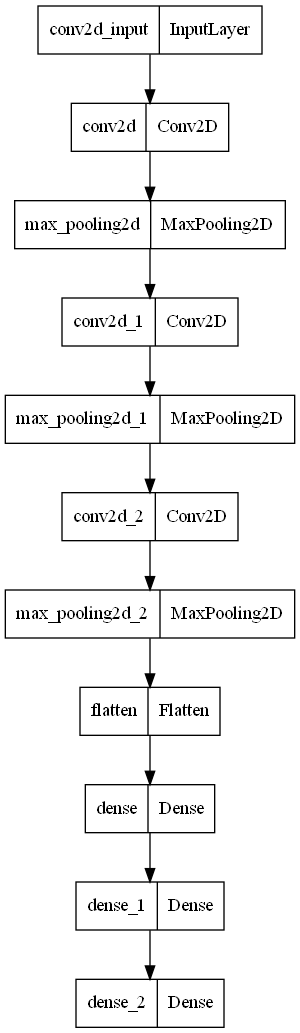

In [68]:
tf.keras.utils.plot_model(model)

In [71]:

tf.keras.utils.plot_model(model, to_file='model_plot.pdf', show_shapes=True, show_layer_names=True,show_layer_activations=True,dpi=300)

In [58]:
#Extracting Features from last Layer

In [59]:
from keras.models import Model

In [60]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

In [61]:
model_feat

In [62]:
feat_train = model_feat.predict(X_train)

263/263 [==============================] - 2s 6ms/step


In [63]:
print(feat_train.shape)

(8400, 64)


In [64]:
feat_test = model_feat.predict(X_test)

113/113 [==============================] - 1s 6ms/step


In [65]:
print(feat_test.shape)

(3600, 64)


In [66]:
print(y_test.shape)

(3600,)


In [67]:
print(y_train.shape)

(8400,)


In [68]:
#try SVM

In [69]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(feat_train,y_train)

print('fitting done !!!')

fitting done !!!


In [70]:
svm.score(feat_train,y_train)

0.9896428571428572

In [71]:
svm.score(feat_test,y_test)

0.9708333333333333

In [72]:
feat_train

array([[0.43098456, 0.        , 0.8018813 , ..., 0.        , 0.65325814,
        0.        ],
       [0.07644133, 0.        , 0.09476063, ..., 0.01022139, 0.        ,
        0.        ],
       [0.5280924 , 0.        , 0.27596796, ..., 0.        , 0.38049626,
        0.018687  ],
       ...,
       [0.5382902 , 0.        , 0.        , ..., 0.        , 0.07061754,
        0.15750068],
       [0.37799054, 0.        , 0.50421315, ..., 0.        , 0.29395604,
        0.        ],
       [0.9580492 , 0.        , 1.093753  , ..., 0.        , 0.49857825,
        0.43436205]], dtype=float32)

In [73]:
feat_train.shape

(8400, 64)

In [74]:
feat_test.shape

(3600, 64)

In [75]:
#sada dodajemo zajedno oba niza, spajamo ih po kolonama

In [76]:
type(feat_train)

numpy.ndarray

In [77]:
feat_train.shape

(8400, 64)

In [78]:
type(y_train)

numpy.ndarray

In [79]:
y_train.shape

(8400,)

In [80]:
y_train1 = y_train.reshape(y_train.shape[0],1)

In [81]:
y_train1.shape

(8400, 1)

In [82]:
train_concat = np.append(feat_train,y_train1,axis=1)

In [83]:
train_concat.shape

(8400, 65)

In [84]:
y_test1 = y_test.reshape(y_test.shape[0],1)

In [85]:
test_concat = np.append(feat_test,y_test1,axis=1)

In [86]:
train_df = pd.DataFrame(train_concat)

In [87]:
test_df = pd.DataFrame(test_concat)

In [88]:
len(train_df)

8400

In [89]:
len(test_df)

3600

In [90]:
train_df.to_csv('COVID-19_Radiography_train1.csv',index=None)
test_df.to_csv('COVID-19_Radiography_test1.csv',index=None)